# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata.head()
study_results.head()

# Combine the data into a single DataFrame

combined_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = 'outer')
# Display the data table for preview


In [2]:
combined_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
combined_df["Mouse ID"].count()

1893

In [4]:
# Checking the number of mice.
number_of_mice = combined_df["Mouse ID"].value_counts()
number_of_mice.count()

249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
unique_df = combined_df[["Mouse ID", "Timepoint"]].nunique(axis=0)
print(unique_df)
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicate_mice_ID = combined_df.loc[combined_df.duplicated(subset = ["Mouse ID", "Timepoint"], keep= False), "Mouse ID"].unique()
duplicate_mice_ID   

Mouse ID     249
Timepoint     10
dtype: int64


array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = combined_df.loc[combined_df["Mouse ID"] == "g989"]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:


#TRIED THIS CODE, BUT IT WAS REMOVING ONLY DUPLICATED , HOWEVER MOUSE ID G989 DID HAVE  SOME DATA WHICH WAS NOT DUPLICATE, HENCE 
#IT WAS NOT REMOVING THAT DATA. WE NEED TO DROP NOW BY MICE ID 
# cleaned_df = combined_df.drop_duplicates(subset = ["Mouse ID" , "Timepoint"],keep=False,)
# cleaned_df.count()

In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = combined_df.loc[combined_df["Mouse ID"] != 'g989', :]
print(cleaned_df.nunique())
cleaned_df.head()

# Checking the number of mice in the clean DataFrame.
#Mouse ID has reduced from 249 to 248

Mouse ID               248
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1633
Metastatic Sites         5
dtype: int64


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
drug_df= cleaned_df.groupby(cleaned_df["Drug Regimen"])
drug_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 


# mean = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).mean()
# mean

#alternative syntax


drug_df_mean= cleaned_df.groupby(cleaned_df["Drug Regimen"])["Tumor Volume (mm3)"].mean()
# mean_df= drug_df_mean["Tumor Volume (mm3)"]

drug_df_median= cleaned_df.groupby(cleaned_df["Drug Regimen"])["Tumor Volume (mm3)"].median()
# # median_df= drug_df_median["Tumor Volume (mm3)"]
# # drug_df_mean

drug_df_variance= cleaned_df.groupby(cleaned_df["Drug Regimen"])["Tumor Volume (mm3)"].var()
# drug_df_variance
# # variance_df= drug_df_variance["Tumor Volume (mm3)"]

drug_df_std= cleaned_df.groupby(cleaned_df["Drug Regimen"])["Tumor Volume (mm3)"].std()
# # std_df= drug_df_std["Tumor Volume (mm3)"]


drug_df_sem= cleaned_df.groupby(cleaned_df["Drug Regimen"])["Tumor Volume (mm3)"].sem()
# sem_df= drug_df_sem["Tumor Volume (mm3)"]



# Assemble the resulting series into a single summary DataFrame.

summary_stat = pd.DataFrame({
                             "Mean Tumor Volume":drug_df_mean, 
                            "Median Tumor Volume":drug_df_median, 
                           "Tumor Volume Variance":drug_df_variance, 
                           "Tumor Volume Std. Dev.":drug_df_std, 
                           "Tumor Volume Std. Err.":drug_df_sem
})
summary_stat.head()

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


summary_agg =  cleaned_df.groupby(['Drug Regimen'])[['Drug Regimen', 'Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg.head()

C:\Users\ljm47\AppData\Local\Temp\ipykernel_29356\1170157723.py:7: FutureWarning: ['Drug Regimen'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  summary_agg =  cleaned_df.groupby(['Drug Regimen'])[['Drug Regimen', 'Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466

In [12]:
cleaned_df.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [13]:
mice_count = cleaned_df["Drug Regimen"].value_counts()
mice_count


Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

## Bar and Pie Charts

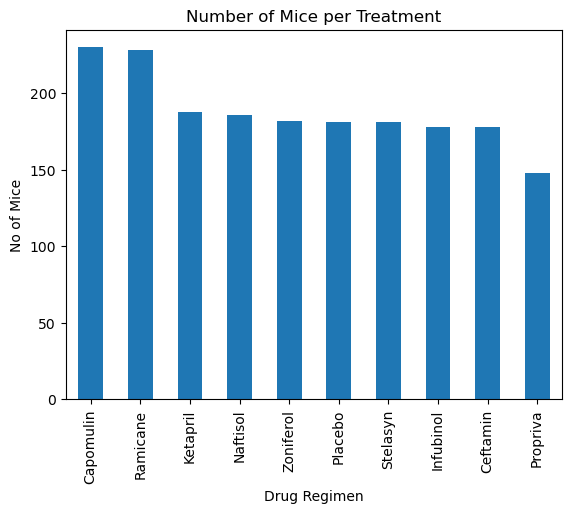

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_test_count_pandas = mice_count.plot(kind = "bar", xlabel = "Drug Regimen", ylabel= "No of Mice", title= "Number of Mice per Treatment")
plt.show()

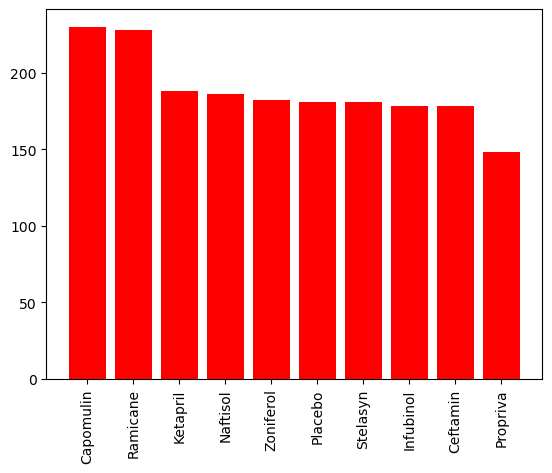

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# drug_test_count_pyplot =  mice_count

x_axis = mice_count.index

y_axis = mice_count.values

plt.bar(x_axis, y_axis, color ='r', align = 'center')
plt.xticks(rotation = 'vertical')
plt.show()

Male      958
Female    922
Name: Sex, dtype: int64


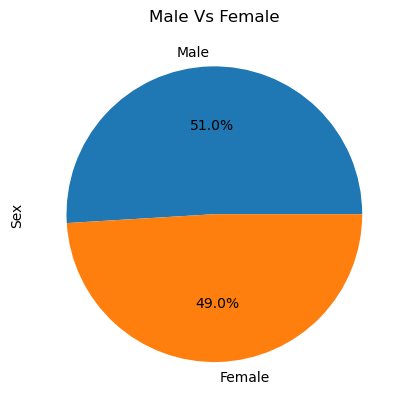

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_gender = cleaned_df["Sex"].value_counts()
print(mice_gender)
mice_gender_pandas = mice_gender.plot(kind="pie",autopct= "%1.1f%%", title="Male Vs Female" )
plt.show()

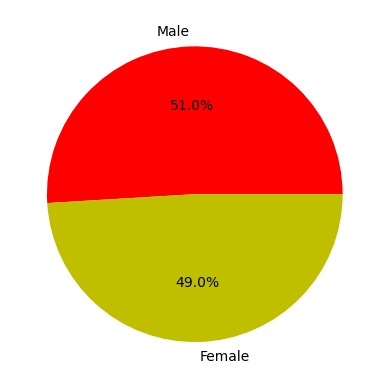

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
label = ["Male", "Female"]
mice_gender_pyplot = plt.pie( mice_gender, labels=label, autopct="%1.1f%%", colors = ['r','y'])
plt.show()

In [18]:
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


#creating seperate DF  displaying only the particular drug
capomulin_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin",:]
capomulin_df

ramicane_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Ramicane",:]

infubinol_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Infubinol",:]

ceftamin_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Ceftamin",:]
ceftamin_df

# xd = ceftamin_df.loc[ceftamin_df["Mouse ID"]== "b447"]
# xd



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
484,a275,Ceftamin,Female,20,28,0,45.000000,0
485,a275,Ceftamin,Female,20,28,5,46.795257,0
486,a275,Ceftamin,Female,20,28,10,47.371343,0
487,a275,Ceftamin,Female,20,28,15,49.734404,0
488,a275,Ceftamin,Female,20,28,20,50.513437,1
...,...,...,...,...,...,...,...,...
1851,y865,Ceftamin,Male,23,26,25,57.173538,2
1852,y865,Ceftamin,Male,23,26,30,59.033275,3
1853,y865,Ceftamin,Male,23,26,35,61.153140,3
1854,y865,Ceftamin,Male,23,26,40,63.469549,3


In [20]:

# Start by getting the last (greatest) timepoint for each mouse

capomulin_last_timepoint = pd.DataFrame(capomulin_df.groupby(['Mouse ID'])['Timepoint'].max())


ramicane_last_timepoint = pd.DataFrame(ramicane_df.groupby(['Mouse ID'])['Timepoint'].max())

infubinol_last_timepoint = pd.DataFrame(infubinol_df.groupby(['Mouse ID'])['Timepoint'].max())

ceftamin_last_timepoint = pd.DataFrame(ceftamin_df.groupby(['Mouse ID'])['Timepoint'].max())
ceftamin_last_timepoint.head()
# capomulin_last_timepoint


,Timepoint
Mouse ID,
a275,45
b447,0
b487,25
b759,30
f436,15


In [21]:

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

capomulin_filtered_df = pd.merge(capomulin_last_timepoint, capomulin_df, on=("Mouse ID", "Timepoint"), how = "left")


ramicane_filtered_df = pd.merge(ramicane_last_timepoint, ramicane_df, on=("Mouse ID", "Timepoint"), how = "left")

infunbinol_filtered_df = pd.merge(infubinol_last_timepoint, infubinol_df, on=("Mouse ID", "Timepoint"), how = "left")

ceftamin_filtered_df = pd.merge(ceftamin_last_timepoint, ceftamin_df, on=("Mouse ID", "Timepoint"), how = "left")


capomulin_filtered_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2
5,i557,45,Capomulin,Female,1,24,47.685963,1
6,i738,45,Capomulin,Female,23,20,37.311846,2
7,j119,45,Capomulin,Female,7,23,38.125164,1
8,j246,35,Capomulin,Female,21,21,38.753265,1
9,l509,45,Capomulin,Male,17,21,41.483008,3


In [22]:


combined_last_timepoint_df =pd.concat([capomulin_filtered_df, ramicane_filtered_df, infunbinol_filtered_df, ceftamin_filtered_df], axis = 0)
combined_last_timepoint_df.reset_index(drop=True, inplace=True)
combined_last_timepoint_df

#shorter way of doing this is :
#drug_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# # Start by getting the last (greatest) timepoint for each mouse
# max_timepoints = cleaned_df.groupby(['Mouse ID'])['Timepoint'].max().reset_index()
# # Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# final_tumor_volume = pd.merge(max_timepoints, pharm_clean_data, on=['Mouse ID', "Timepoint"], how = "left")

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2
...,...,...,...,...,...,...,...,...
95,x226,0,Ceftamin,Male,23,28,45.000000,0
96,x581,45,Ceftamin,Female,19,28,64.634949,3
97,x822,45,Ceftamin,Male,3,29,61.386660,3
98,y769,45,Ceftamin,Female,6,27,68.594745,4


In [23]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data= []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug in drug_list:
   
    quartiles = combined_last_timepoint_df.loc[combined_last_timepoint_df["Drug Regimen"]== drug, "Tumor Volume (mm3)"].quantile([.25,.5,.75]).round(2)
    #this will locate all rows with drug name  = "Drug" and with column Tumor Value
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    # tumor_volume_data.append(quartiles.values)
   
    print(f"------------------------------------------------------------")
    print(f"The lower(first) quartile of {drug} treatments is: {lowerq}")
    print(f"The upper quartile(third) of {drug} treatments is: {upperq}")
    print(f"The interquartile range of {drug} treatments is: {iqr}")
    print(f"Values below {lower_bound} could be {drug} outliers.")
    print(f"Values above {upper_bound} could be {drug} outliers.")
    print(f"------------------------------------------------------------")

    tumor_volume_data.append(combined_last_timepoint_df.loc[combined_last_timepoint_df["Drug Regimen"]== drug, "Tumor Volume (mm3)"])
tumor_volume_data
# tumor_volume_data

    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds



------------------------------------------------------------
The lower(first) quartile of Capomulin treatments is: 32.38
The upper quartile(third) of Capomulin treatments is: 40.16
The interquartile range of Capomulin treatments is: 7.78
Values below 20.71 could be Capomulin outliers.
Values above 51.83 could be Capomulin outliers.
------------------------------------------------------------
------------------------------------------------------------
The lower(first) quartile of Ramicane treatments is: 31.56
The upper quartile(third) of Ramicane treatments is: 40.66
The interquartile range of Ramicane treatments is: 9.1
Values below 17.91 could be Ramicane outliers.
Values above 54.31 could be Ramicane outliers.
------------------------------------------------------------
------------------------------------------------------------
The lower(first) quartile of Infubinol treatments is: 54.05
The upper quartile(third) of Infubinol treatments is: 65.53
The interquartile range of Infubino

[0     38.982878
 1     38.939633
 2     30.485985
 3     37.074024
 4     40.159220
 5     47.685963
 6     37.311846
 7     38.125164
 8     38.753265
 9     41.483008
 10    38.846876
 11    28.430964
 12    33.329098
 13    46.539206
 14    32.377357
 15    41.581521
 16    23.343598
 17    40.728578
 18    34.455298
 19    31.023923
 20    40.658124
 21    39.952347
 22    36.041047
 23    28.484033
 24    31.896238
 Name: Tumor Volume (mm3), dtype: float64,
 25    38.407618
 26    43.047543
 27    38.810366
 28    32.978522
 29    38.342008
 30    33.397653
 31    37.311236
 32    40.659006
 33    29.128472
 34    33.562402
 35    36.374510
 36    31.560470
 37    36.134852
 38    22.050126
 39    30.564625
 40    31.095335
 41    45.220869
 42    36.561652
 43    37.225650
 44    43.419381
 45    30.276232
 46    40.667713
 47    43.166373
 48    44.183451
 49    30.638696
 Name: Tumor Volume (mm3), dtype: float64,
 50    67.973419
 51    65.525743
 52    57.031862
 53    66.083

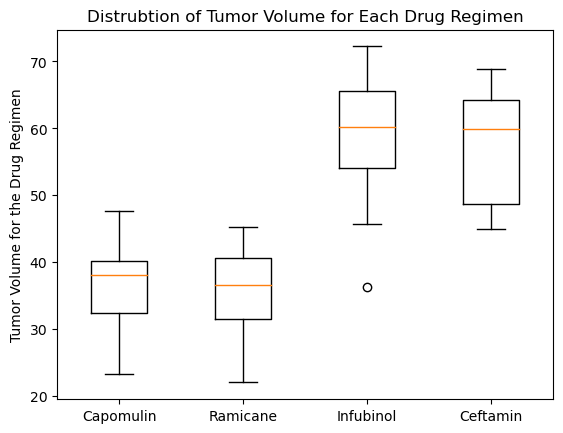

In [24]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_title('Distrubtion of Tumor Volume for Each Drug Regimen')
ax1.set_ylabel('Tumor Volume for the Drug Regimen')
ax1.boxplot(tumor_volume_data, labels =drug_list)  #box plot automatically finds the quartiles based on tumor volume data df.
plt.show()

## Line and Scatter Plots

In [25]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df1 = cleaned_df.loc[cleaned_df["Drug Regimen"]=="Capomulin"]
capomulin_df1.head()

mouse = "s185"
capomulin_mouse= capomulin_df1.loc[capomulin_df1["Mouse ID"] == mouse, :]
capomulin_mouse1 =capomulin_mouse[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
capomulin_mouse1


,Mouse ID,Timepoint,Tumor Volume (mm3)
10,s185,0,45.000000
11,s185,5,43.878496
12,s185,10,37.614948
13,s185,15,38.177232
14,s185,20,36.866876
15,s185,25,33.949940
16,s185,30,32.959671
17,s185,35,28.328531
18,s185,40,25.472143
19,s185,45,23.343598


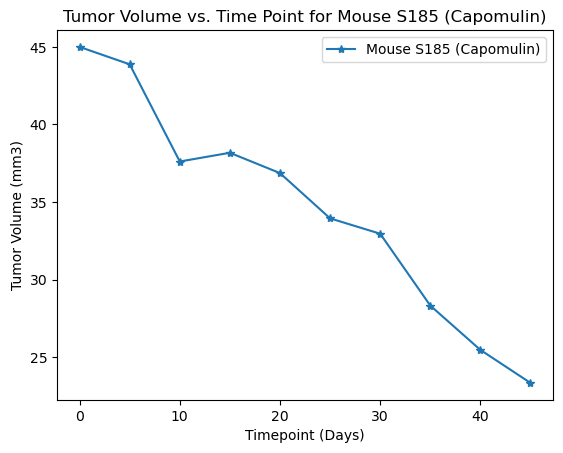

In [26]:
x_axis = capomulin_mouse1["Timepoint"]
y_axis = capomulin_mouse1["Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis, marker= "*", label='Mouse S185 (Capomulin)')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume vs. Time Point for Mouse S185 (Capomulin)')
plt.legend()
plt.show()

          Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  \
Mouse ID                                                          
b128             9.0        22.0       22.5           41.963636   
b742             7.0        21.0       22.5           40.083699   
f966            16.0        17.0       10.0           36.505973   
g288             3.0        19.0       22.5           41.990097   
g316            22.0        22.0       22.5           44.613344   

          Metastatic Sites  
Mouse ID                    
b128                   0.7  
b742                   0.0  
f966                   0.0  
g288                   0.8  
g316                   1.0  


C:\Users\ljm47\AppData\Local\Temp\ipykernel_29356\3349966032.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_tumor_volume = capomulin_df1.groupby(["Mouse ID"]).mean()


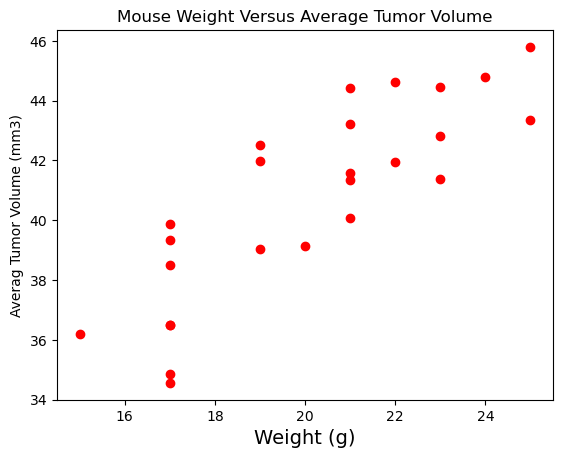

In [27]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

fig1, ax1 = plt.subplots()
capomulin_df1 = cleaned_df.loc[cleaned_df["Drug Regimen"]=="Capomulin"]
capomulin_df1

average_tumor_volume = capomulin_df1.groupby(["Mouse ID"]).mean()
# average_tumor_volume = average_tumor_volume[["Weight (g)", "Tumor Volume (mm3)"]]
print(average_tumor_volume.head())

plt.scatter(average_tumor_volume["Weight (g)"], average_tumor_volume["Tumor Volume (mm3)"], color = "r")
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)')
plt.show()

## Below a is scatter which shows relation between Weight and Average Tumor for each weight RATHER THAN above scatter plot which shows average tumor against weight of single mouse. 
## only for reference purpose not taken into corelation study

C:\Users\ljm47\AppData\Local\Temp\ipykernel_29356\967572000.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_tumor_volumew = capomulin_df1.groupby(["Weight (g)"]).mean()


   Weight (g)  Age_months  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0          15   16.000000  22.500000           36.182040          0.000000
1          17   14.769231  21.538462           37.214133          1.030769
2          19    7.666667  22.500000           41.182391          0.700000
3          20   23.000000  22.500000           39.141053          0.600000
4          21   17.458333  21.666667           42.088700          0.625000
5          22   15.500000  22.500000           43.288490          0.850000
6          23    6.478261  20.217391           43.341051          0.521739
7          24    1.000000  22.500000           44.805810          0.200000
8          25   14.857143  18.214286           44.062109          0.642857


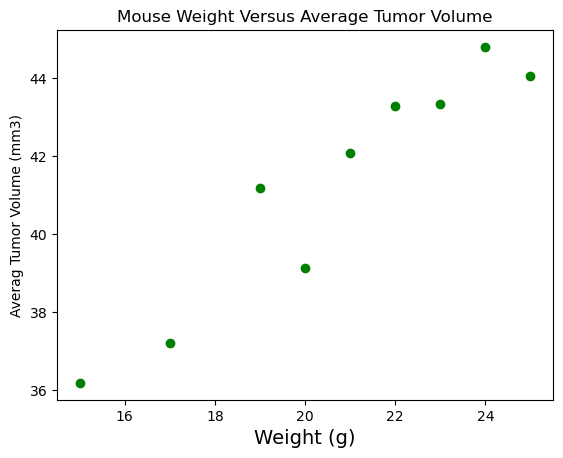

In [28]:
fig1, ax1 = plt.subplots()
capomulin_df1w = cleaned_df.loc[cleaned_df["Drug Regimen"]=="Capomulin"]
capomulin_df1w

average_tumor_volumew = capomulin_df1.groupby(["Weight (g)"]).mean()
# average_tumor_volume = average_tumor_volume[["Weight (g)", "Tumor Volume (mm3)"]]
# print(average_tumor_volumew)
average_tumor_volumew.reset_index(inplace=True)
print(average_tumor_volumew)
plt.scatter(average_tumor_volumew["Weight (g)"], average_tumor_volumew["Tumor Volume (mm3)"], color = "g")
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [29]:
# Calculate the correlation coefficient and a linear regression model 

correlation = st.pearsonr(average_tumor_volume["Weight (g)"], average_tumor_volume["Tumor Volume (mm3)"])

print(f"The correlation between mouse weight and the average tumor volume {round(correlation[0],2)}")
print(correlation)


The correlation between mouse weight and the average tumor volume 0.84
PearsonRResult(statistic=0.8419363424694721, pvalue=1.3225722434712388e-07)


          Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  \
Mouse ID                                                          
b128             9.0        22.0       22.5           41.963636   
b742             7.0        21.0       22.5           40.083699   

          Metastatic Sites  
Mouse ID                    
b128                   0.7  
b742                   0.0  


C:\Users\ljm47\AppData\Local\Temp\ipykernel_29356\198131193.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_tumor_volume = capomulin_df1.groupby(["Mouse ID"]).mean()


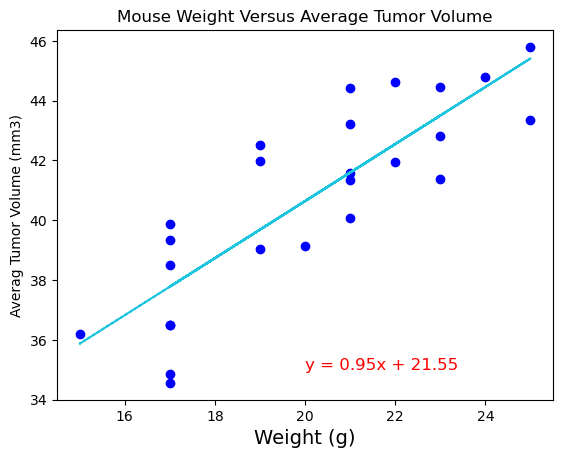

In [30]:
fig1, ax1 = plt.subplots()
capomulin_df1 = cleaned_df.loc[cleaned_df["Drug Regimen"]=="Capomulin"]
capomulin_df1

average_tumor_volume = capomulin_df1.groupby(["Mouse ID"]).mean()
# average_tumor_volume = average_tumor_volume[["Weight (g)", "Tumor Volume (mm3)"]]
print(average_tumor_volume.head(2))

t_slope, t_int, t_r, t_p, t_std_err = st.linregress(average_tumor_volume["Weight (g)"], average_tumor_volume["Tumor Volume (mm3)"]) # there are the x -independent variable and y - depended variable
t_fit = t_slope * average_tumor_volume["Weight (g)"] + t_int
line_eq = "y = " + str(round(t_slope,2)) + "x + " + str(round(t_int,2))

plt.scatter(average_tumor_volume["Weight (g)"], average_tumor_volume["Tumor Volume (mm3)"], color = "b")
#plotting the y =f(x)
plt.plot(average_tumor_volume["Weight (g)"],t_fit,"--", color='#1cc5dd')

plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)')
plt.annotate(line_eq,(20,35),fontsize=12,color="red")
plt.show()